# Exploring Hacker News Posts
---

## 1. Introduction

Hacker News is a technology-related community site where user-submitted posts are voted and commented upon. Users can submit `Ask HN` posts to ask the Hacker News community a specific question, or submit `Show HN` posts to show the Hacker News community a project, product, or just generally something interesting.

The objectives of this project are to determine the following:

- **Do `Ask HN` or `Show HN` posts receive more comments and points on average?**
- **Do `Ask HN` and `Show HN` posts created at a certain time receive more comments and points on average?**

You can find the dataset [here](https://www.kaggle.com/hacker-news/hacker-news-posts), but note that it has been reduced from almost 300,000 rows to approximately 30,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. 

--- 

## 2. Open and Explore the Data

We will begin by opening and exploring the first few rows of the data.

In [1]:
# Open and read the file
from csv import reader
open_file = open('hacker_news.csv', encoding = "utf8")
read_file = reader(open_file)
hn = list(read_file)

# Separate headers from data
headers = hn[:1]
hn = hn[1:]

# Display headers and sample of data
print(headers)
for row in hn[:3]:
    print(row)

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]
['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']
['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']
['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']


We also observe that `Ask HN` and `Show HN` posts have titles that begin with `Ask HN` and `Show HN` respectively.

In [2]:
# Example of Ask HN post title
print(hn[10][1])

# Example of Show HN post title
print(hn[52][1])

Ask HN: What TLD do you use for local development?
Show HN: Finding puns computationally


--- 

## 3. Classify the Data

The posts in the dataset will be classified into 3 categories:
1. `Ask HN` posts
2. `Show HN` posts
3. All other posts

In [3]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    title_low = title.lower()
    
    # Ask HN posts
    if title_low.startswith("ask hn"):
        ask_posts.append(row)
        
    # Show HN posts
    elif title_low.startswith("show hn"):
        show_posts.append(row)
    
    # Other posts
    else:
        other_posts.append(row)

print(f"There are {len(ask_posts)} 'Ask HN' posts.")
print(f"There are {len(show_posts)} 'Show HN' posts.")
print(f"There are {len(other_posts)} other posts which are not 'Ask HN' and 'Show HN' posts.")

There are 9139 'Ask HN' posts.
There are 10158 'Show HN' posts.
There are 273822 other posts which are not 'Ask HN' and 'Show HN' posts.


---

## 4. Do `Ask HN` or `Show HN` posts receive more comments and points on average?

In [4]:
# Average number of comments for 'Ask HN' posts
total_ask_comments = 0

for post in ask_posts:
    total_ask_comments += int(post[4])
    
avg_ask_comments = total_ask_comments / len(ask_posts)
print(f"'Ask HN' posts have an average of {avg_ask_comments:.2f} comments.")

# Average number of comments for 'Show HN' posts
total_show_comments = 0

for post in show_posts:
    total_show_comments += int(post[4])
    
avg_show_comments = total_show_comments / len(show_posts)
print(f"'Show HN' posts have an average of {avg_show_comments:.2f} comments.")

# Average number of comments for other posts
total_other_comments = 0

for post in other_posts:
    total_other_comments += int(post[4])
    
avg_other_comments = total_other_comments / len(other_posts)
print(f"Other posts have an average of {avg_other_comments:.2f} comments.")

'Ask HN' posts have an average of 10.39 comments.
'Show HN' posts have an average of 4.89 comments.
Other posts have an average of 6.46 comments.


In [5]:
# Average number of points for 'Ask HN' posts
total_ask_points = 0

for post in ask_posts:
    total_ask_points += int(post[3])
    
avg_ask_points = total_ask_points / len(ask_posts)
print(f"'Ask HN' posts have an average of {avg_ask_points:.2f} points.")

# Average number of points for 'Show HN' posts
total_show_points = 0

for post in show_posts:
    total_show_points += int(post[3])
    
avg_show_points = total_show_points / len(show_posts)
print(f"'Show HN' posts have an average of {avg_show_points:.2f} points.")

# Average number of points for other posts
total_other_points = 0

for post in other_posts:
    total_other_points += int(post[3])
    
avg_other_points = total_other_points / len(other_posts)
print(f"Other posts have an average of {avg_other_points:.2f} points.")

'Ask HN' posts have an average of 11.31 points.
'Show HN' posts have an average of 14.84 points.
Other posts have an average of 15.16 points.


Let's visualise the average number of comments and points for the 3 post categories on bar graphs.

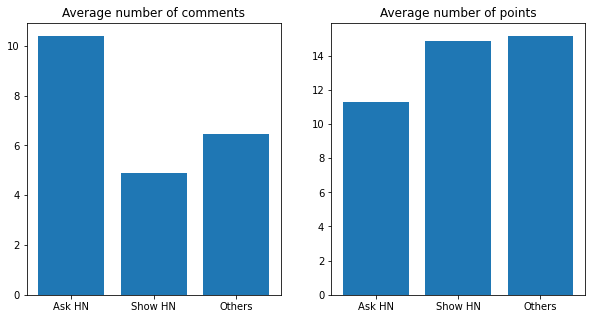

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([x for x in range(1, 4)])
xlabels = ['Ask HN', 'Show HN', 'Others']

plt.figure(figsize = (10, 5))

# Plot average number of comments
plt.subplot(1, 2, 1)
plt.bar(x, np.array([avg_ask_comments, avg_show_comments, avg_other_comments]))
plt.xticks(ticks = x, labels = xlabels)
plt.title('Average number of comments')

# Plot average number of points
plt.subplot(1, 2, 2)
plt.bar(x, np.array([avg_ask_points, avg_show_points, avg_other_points]))
plt.xticks(ticks = x, labels = xlabels)
plt.title('Average number of points')

plt.show()

On average, **`Ask HN` posts receive the most number of comments but fewer points**. Since the `Ask HN` post is a question, the community is more likely to comment and answer the question, instead of upvoting the question.

On the contrary, **`Show HN` posts receive fewer comments but more points than `Ask HN` posts**, which suggests that the community is more likely to upvote rather than comment on a project or some interesting information shared.

It is also observed that other posts receive:
- fewer comments than `Ask HN` posts but more comments than `Show HN` posts
- similar number of points as `Shown HN` posts

---

## 5. Do `Ask HN` and `Show HN` posts created at a certain time receive more comments and points on average?

In [7]:
import datetime as dt

# Save time created, number of comments and points in new list
result_list = []

for post in ask_posts:
    created_at = post[6]
    num_comments = int(post[4])
    num_points = int(post[3])

    save = [created_at, num_comments, num_points]
    result_list.append(save)

# Create frequency tables for number of posts, comments and points by hour
counts_by_hour = {} 
comments_by_hour = {} 
points_by_hour = {} 

for row in result_list:   
    created_at_str = row[0]
    created_at_dt = dt.datetime.strptime(created_at_str, "%m/%d/%Y %H:%M") # convert string to datetime object
    hour = created_at_dt.strftime("%H") # select hour from datetime object
    
    num_comments = row[1]
    num_points = row[2]

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_comments
        points_by_hour[hour] = num_points

    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_comments
        points_by_hour[hour] += num_points
        
# Compute average number of comments per post by hour
avg_comments_by_hour = []
for hour in comments_by_hour:
    avg_comments_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])
    
# Swap columns and sort by descending order
swap_avg_comments_by_hour = []
for row in avg_comments_by_hour:
    swap_avg_comments_by_hour.append([row[1], row[0]])
    
sorted_swap = sorted(swap_avg_comments_by_hour, reverse = True)

print("Top 5 Hours for Ask Posts Comments:")

for row in sorted_swap[:5]:
    avg_comments = row[0]
    hour_str = row[1]
    
    hour_dt = dt.datetime.strptime(hour_str, "%H") # convert hour to datetime object
    hour_str = dt.datetime.strftime(hour_dt, "%H:%M") # convert datetime object to string
    
    print(f'{hour_str}: {avg_comments:.2f} average comments per post')

Top 5 Hours for Ask Posts Comments:
15:00: 28.68 average comments per post
13:00: 16.32 average comments per post
12:00: 12.38 average comments per post
02:00: 11.14 average comments per post
10:00: 10.68 average comments per post


**On average, `Ask HN` posts created at 13:00 and 15:00 receive more comments than other times**.

Now, we will compute the average number of points per `Ask HN` post in each hour.

In [8]:
# Compute average number of points per post by hour
avg_points_by_hour = []
for hour in points_by_hour:
    avg_points_by_hour.append([hour, points_by_hour[hour] / counts_by_hour[hour]])
    
# Swap columns and sort by descending order
swap_avg_points_by_hour = []
for row in avg_points_by_hour:
    swap_avg_points_by_hour.append([row[1], row[0]])
    
sorted_swap = sorted(swap_avg_points_by_hour, reverse = True)

print("Top 5 Hours for Ask Posts Points:")

for row in sorted_swap[:5]:
    avg_points = row[0]
    hour_str = row[1]
    
    hour_dt = dt.datetime.strptime(hour_str, "%H") # convert hour to datetime object
    hour_str = dt.datetime.strftime(hour_dt, "%H:%M") # convert datetime object to string
    
    print(f'{hour_str}: {avg_points:.2f} average points per post')

Top 5 Hours for Ask Posts Points:
15:00: 21.64 average points per post
13:00: 17.93 average points per post
12:00: 13.58 average points per post
10:00: 13.44 average points per post
17:00: 12.19 average points per post


**Similarly, `Ask HN` posts created at 13:00 and 15:00 receive more points than other times**.

Let's visualise the time distribution of average comments and points per `Ask HN` post in a day.

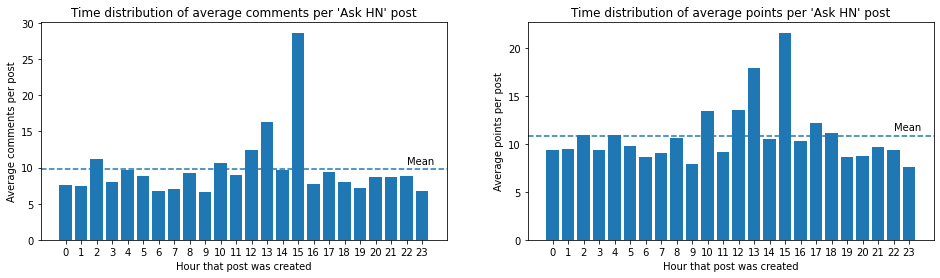

In [9]:
# Sort list by hour in ascending order
hour_list = []
comments_list = []
points_list = []

for hour, comments in sorted(avg_comments_by_hour):
    hour_list.append(int(hour))
    comments_list.append(comments)

for hour, points in sorted(avg_points_by_hour):
    points_list.append(points)

plt.figure(figsize = (16, 4))

# Plot average number of comments per post by hour
plt.subplot(1, 2, 1)
plt.bar(hour_list, comments_list)
plt.title("Time distribution of average comments per 'Ask HN' post")

plt.xticks(ticks = hour_list)
plt.xlabel('Hour that post was created')
plt.ylabel('Average comments per post')

plt.axhline(sum(comments_list) / len(comments_list), linestyle = '--')
plt.text(22, 10.5, 'Mean')

# Plot average number of points per post by hour
plt.subplot(1, 2, 2)
plt.bar(hour_list, points_list)
plt.title("Time distribution of average points per 'Ask HN' post")

plt.xticks(ticks = hour_list)
plt.xlabel('Hour that post was created')
plt.ylabel('Average points per post')

plt.axhline(sum(points_list) / len(points_list), linestyle = '--')
plt.text(22, 11.5, 'Mean')

plt.show()

**`Ask HN` posts created at 13:00 and 15:00 receive significantly more comments and points than the mean**. A possible explanation is that more users browse Hacker News at these times, hence new questions created will receive more responses from the community.

Let's do a similar analysis for the comments and points of `Show HN` posts by hour.

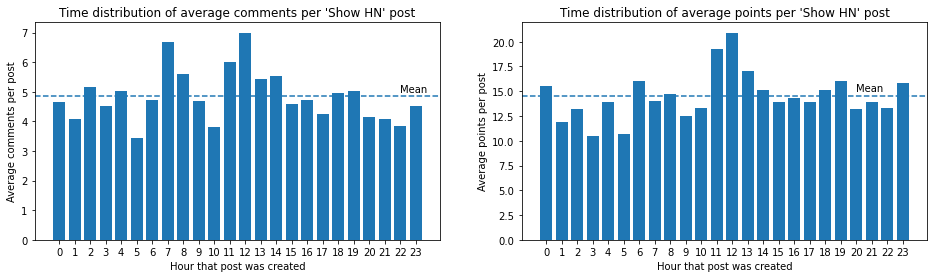

In [10]:
# Save time created, number of comments and points in new list
result_list = []

for post in show_posts:
    created_at = post[6]
    num_comments = int(post[4])
    num_points = int(post[3])

    save = [created_at, num_comments, num_points]
    result_list.append(save)

# Create frequency tables for number of posts, comments and points by hour
counts_by_hour = {} 
comments_by_hour = {} 
points_by_hour = {} 

for row in result_list:   
    created_at_str = row[0]
    created_at_dt = dt.datetime.strptime(created_at_str, "%m/%d/%Y %H:%M") # convert string to datetime object
    hour = created_at_dt.strftime("%H") # select hour from datetime object
    
    num_comments = row[1]
    num_points = row[2]

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_comments
        points_by_hour[hour] = num_points

    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_comments
        points_by_hour[hour] += num_points
        
# Compute average number of comments per post by hour
avg_comments_by_hour = []
for hour in comments_by_hour:
    avg_comments_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])
       
# Compute average number of points per post by hour
avg_points_by_hour = []
for hour in points_by_hour:
    avg_points_by_hour.append([hour, points_by_hour[hour] / counts_by_hour[hour]])
    
# Sort list by hour in ascending order
hour_list = []
comments_list = []
points_list = []

for hour, comments in sorted(avg_comments_by_hour):
    hour_list.append(int(hour))
    comments_list.append(comments)

for hour, points in sorted(avg_points_by_hour):
    points_list.append(points)

plt.figure(figsize = (16, 4))

# Plot average number of comments per post by hour
plt.subplot(1, 2, 1)
plt.bar(hour_list, comments_list)
plt.title("Time distribution of average comments per 'Show HN' post")

plt.xticks(ticks = hour_list)
plt.xlabel('Hour that post was created')
plt.ylabel('Average comments per post')

plt.axhline(sum(comments_list) / len(comments_list), linestyle = '--')
plt.text(22, 5, 'Mean')

# Plot average number of points per post by hour
plt.subplot(1, 2, 2)
plt.bar(hour_list, points_list)
plt.title("Time distribution of average points per 'Show HN' post")

plt.xticks(ticks = hour_list)
plt.xlabel('Hour that post was created')
plt.ylabel('Average points per post')

plt.axhline(sum(points_list) / len(points_list), linestyle = '--')
plt.text(20, 15, 'Mean')

plt.show()

**`Show HN` posts created at 11:00 and 12:00 receive significantly more comments and points than the mean**.

---

## 6. Conclusion

Do `Ask HN` or `Show HN` posts receive more comments and points on average?

- `Ask HN` posts receive the **most number of comments but fewer points**.
- `Show HN` posts are receive **fewer comments but more points** than `Ask HN` posts.

Do `Ask HN` posts created at a certain time receive more comments and points on average?

- `Ask HN` posts **created at 13:00 and 15:00 receive more comments and points** than the mean. 
- `Show HN` posts **created at 11:00 and 12:00 receive more comments and points** than the mean.
- New posts can be created at these times to maximise the number of responses.